### Logistic regression

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
df = pd.read_csv('breast_cancer.csv')
df.drop(["id","Unnamed: 32"],axis=1, inplace=True)
df.iloc[:,0] = df.iloc[:,0].map({'M' : 1, 'B' : 0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [33]:
def sigmoid(z):
    p = 1/(1+np.exp(-z))
    return p

In [34]:
def cost_func(X, y, theta):
    hyp = sigmoid(np.dot(X, theta))
    return (-(y.T * np.log(hyp) + (1 - y).T * np.log(1 - hyp))).mean()

In [35]:
def gradient_descent(X, y, epochs, alpha=0.01):
    theta = np.zeros(X.shape[1])
    cost_history = []
    for i in range(epochs):
        gradient = alpha * (np.dot(X.T, (sigmoid(np.dot(X, theta))-y)) / X.shape[0])
        theta -= gradient
        cost = cost_func(X, y, theta)
        cost_history.append(cost)
    return theta,cost_history

In [52]:
Iterations = 10000
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 1)
theta,cost_history = gradient_descent(X_train, y_train, Iterations)
y_pred = sigmoid(X_test.dot(theta))
y_label = (y_pred>0.5).astype(int)

In [48]:
from sklearn import metrics
print("\nAccuracy is : {}%".format(metrics.accuracy_score(y_test, y_label)*100))


Accuracy is : 82.45614035087719%


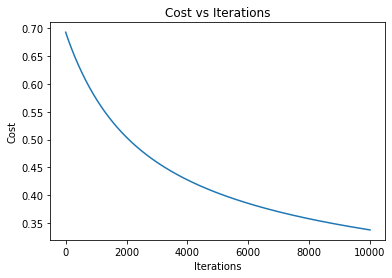

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.arange(Iterations),cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()